In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# dataset

cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data',names=cols)

In [3]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df.shape

(19020, 11)

In [5]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [6]:
# we are going to convert 0 to g and 1 for h

df['class'] = (df['class'] == 'g').astype(int)

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


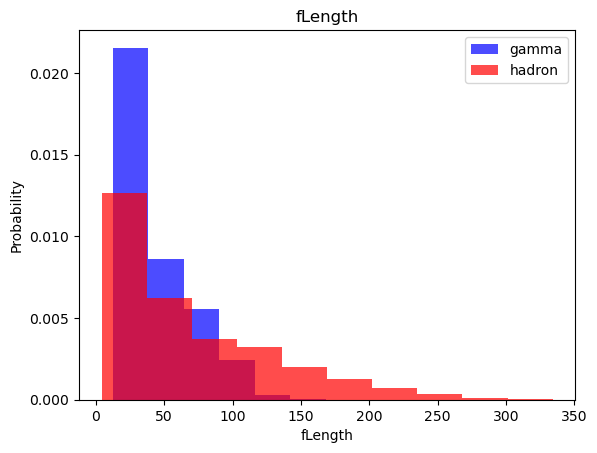

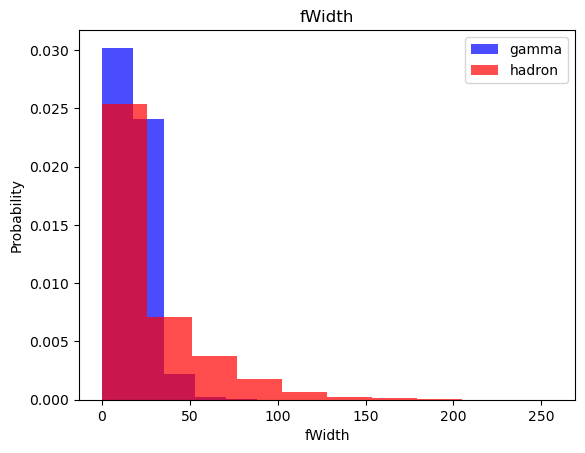

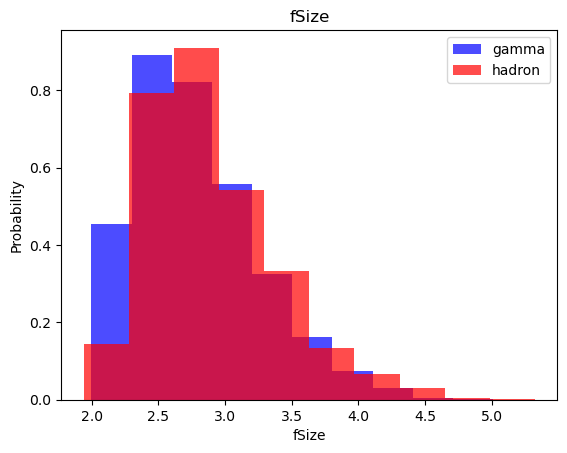

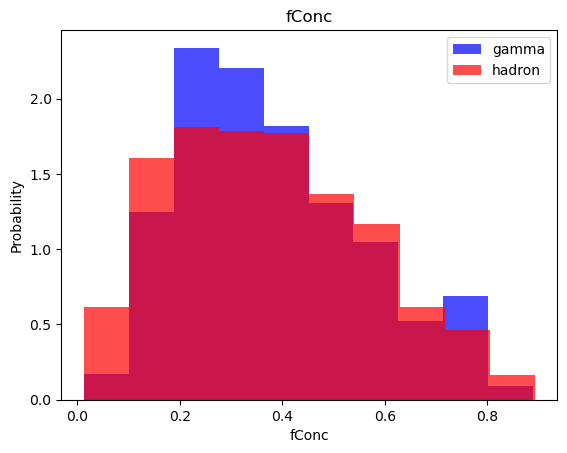

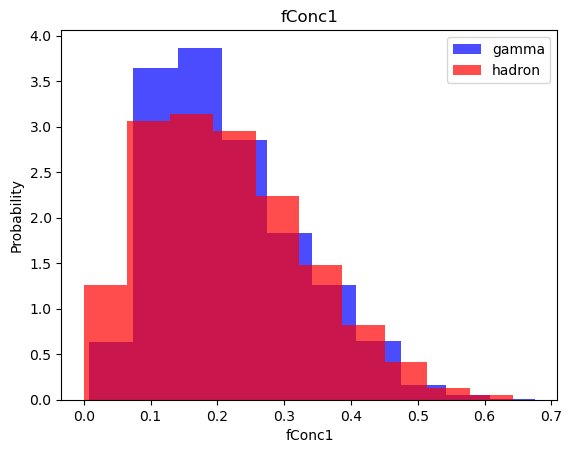

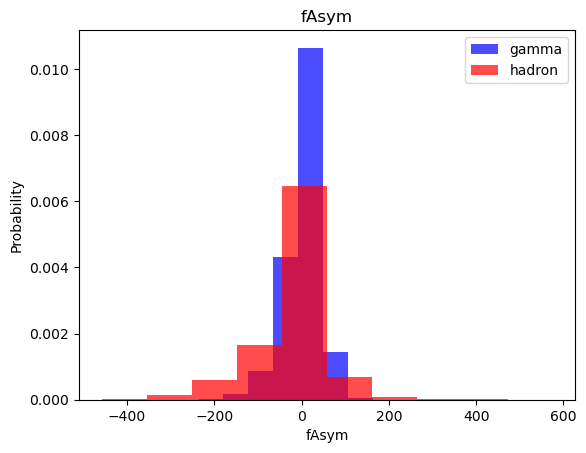

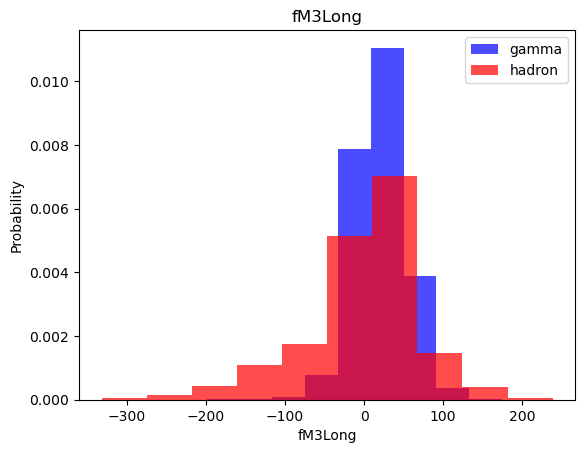

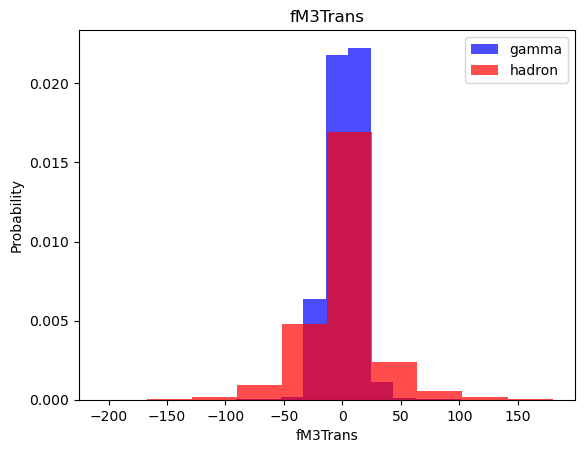

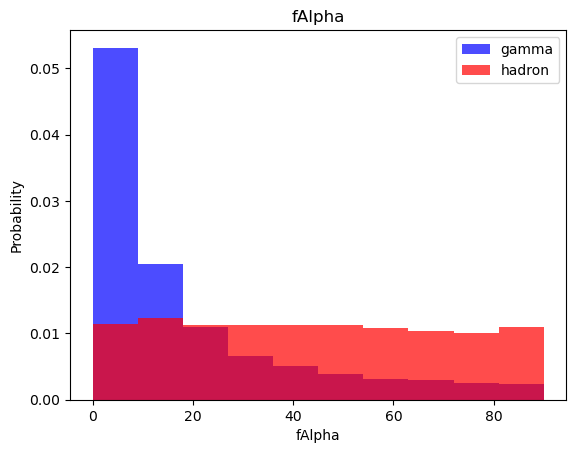

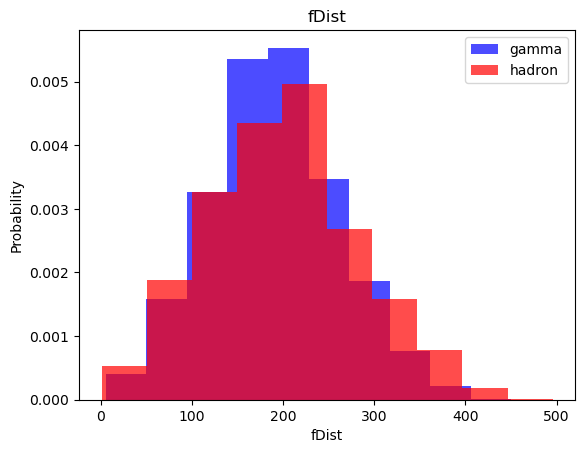

In [8]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color = 'blue', label='gamma',alpha = 0.7, density = True)
    plt.hist(df[df['class'] == 0][label], color = 'red', label='hadron',alpha = 0.7, density = True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

## Train, validation and test dataset

In [9]:
train, valid, test = np.split(df.sample(frac = 1),[int(0.6*len(df)) , int(0.8*len(df))]) # df.sample(frac = 1) this will shuffle data randomly

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
# the is a lot of difference bwteen each values in row we have to do scaling so that pur model works perfectly

def scale_dataset(dataframe,oversample= False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # hstack --> takes and array and stack it with other arrays
    data = np.hstack((X,np.reshape(y,(-1,1))))  # since x is in 2d and we have to convert y also to 2d for precessinfg so we used reshape

    return data,X,y

In [11]:
len(train)

11412

In [12]:
print(len(train[train['class'] == 1]))
print(len(train[train['class'] == 0]))

7340
4072


In [13]:
# as we can see a large difference between each label the chance of getting error is high
# to overcome this we use RnadomSampler

train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [14]:
len(y_train)

14680

In [15]:
len(X_train)

14680

In [16]:
sum(y_train == 1)

7340

In [17]:
sum(y_train == 0)

7340

In [18]:
# now we have same level data

# K-nearest neighbors
- it uses euclidean distance
- formula = d = squareroot((x1-x2)**2 + (y1-y2)**2)
- k is used to denote how many neighbours we compare with mostle k = 3 or 5

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = knn_model.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1301
           1       0.87      0.82      0.84      2503

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.78      3804
weighted avg       0.81      0.80      0.80      3804



# Naive Bayes
- conditional probability

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54      1301
           1       0.76      0.85      0.80      2503

    accuracy                           0.72      3804
   macro avg       0.69      0.66      0.67      3804
weighted avg       0.71      0.72      0.71      3804



# Logistic Regression
- best fitting line
- y = mx + c
- Sigmoid function


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54      1301
           1       0.76      0.85      0.80      2503

    accuracy                           0.72      3804
   macro avg       0.69      0.66      0.67      3804
weighted avg       0.71      0.72      0.71      3804



# Support Vector Machine

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [31]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1301
           1       0.91      0.85      0.88      2503

    accuracy                           0.84      3804
   macro avg       0.83      0.84      0.83      3804
weighted avg       0.85      0.84      0.85      3804



# Neural Networks

In [32]:
import tensorflow as tf

2024-07-06 01:10:00.898193: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
def plot_history(history):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (8,4))
    ax1.plot(history.history['loss'],label = 'loss')
    ax1.plot(history.history['val_loss'],label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label = 'accuracy')
    ax2.plot(history.history['val_accuracy'],label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()

In [34]:
# Define the model
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid'),  # Output layer with 1 unit for binary classification
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
    return nn_model,history

nodes 16, dropout 0, lr 0.1, batch size 32


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


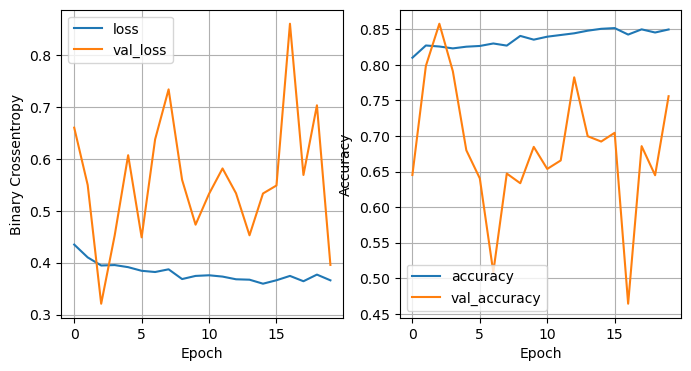

nodes 16, dropout 0, lr 0.1, batch size 64


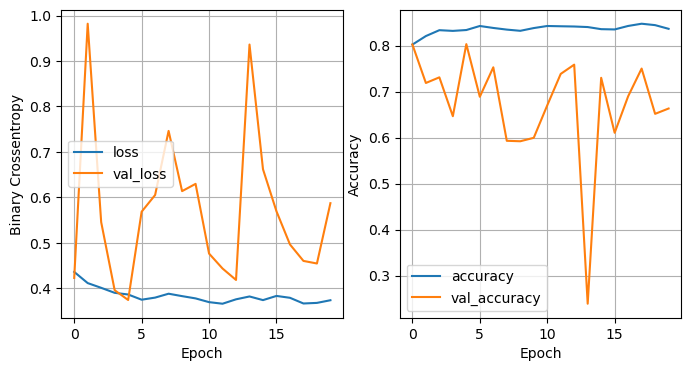

nodes 16, dropout 0, lr 0.1, batch size 128


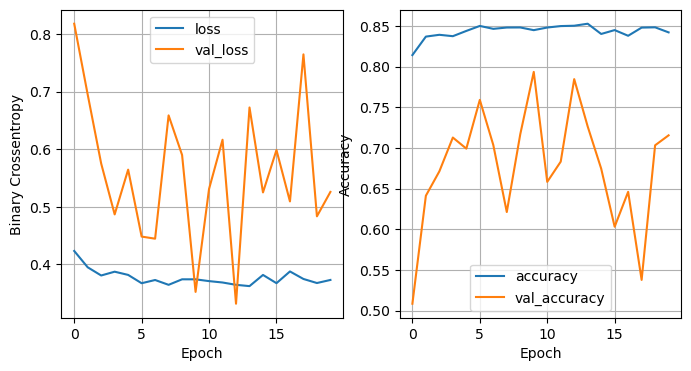

nodes 16, dropout 0, lr 0.005, batch size 32


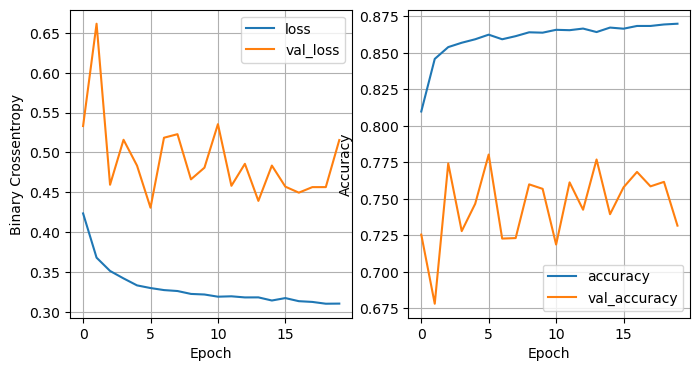

nodes 16, dropout 0, lr 0.005, batch size 64


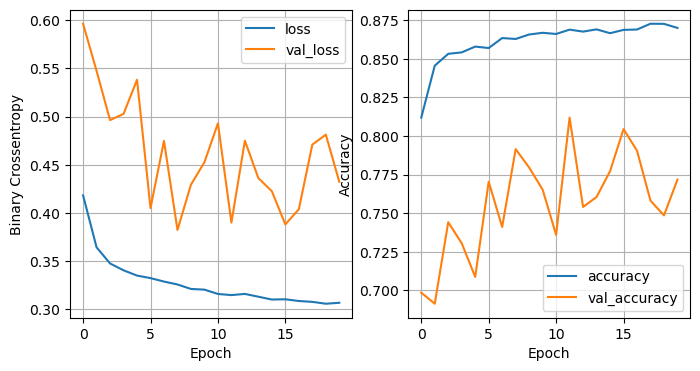

nodes 16, dropout 0, lr 0.005, batch size 128


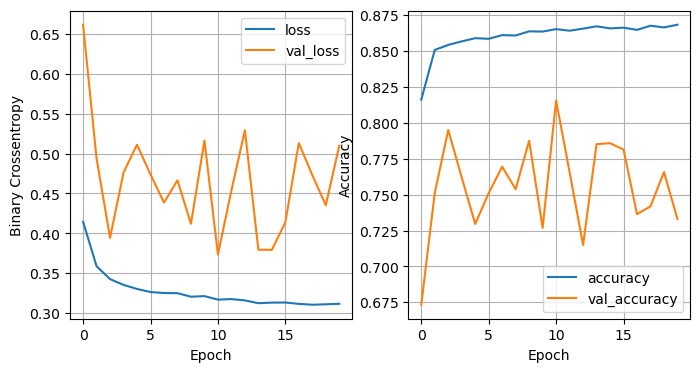

nodes 16, dropout 0, lr 0.005, batch size 32


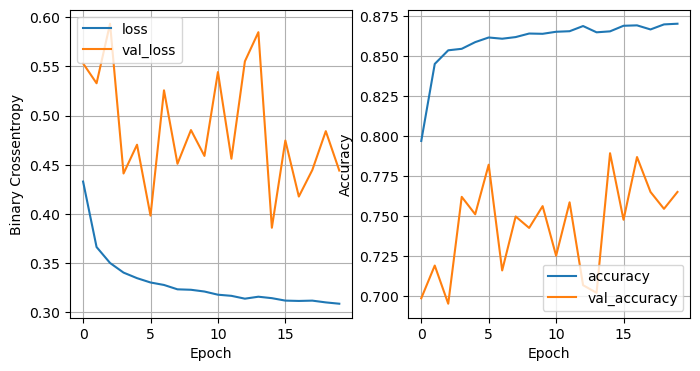

nodes 16, dropout 0, lr 0.005, batch size 64


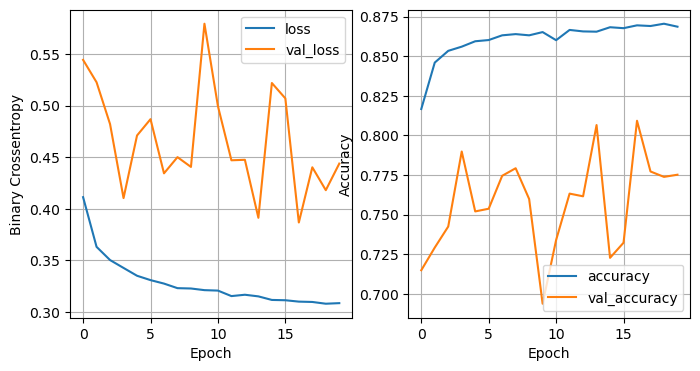

nodes 16, dropout 0, lr 0.005, batch size 128


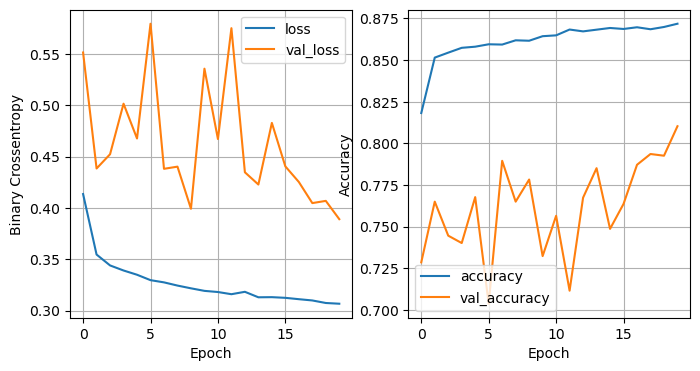

nodes 16, dropout 0.2, lr 0.1, batch size 32


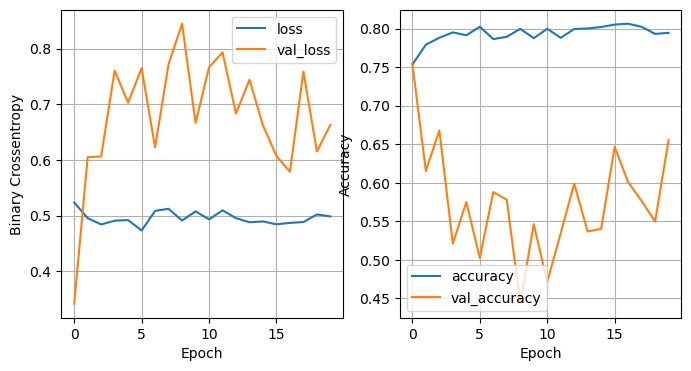

nodes 16, dropout 0.2, lr 0.1, batch size 64


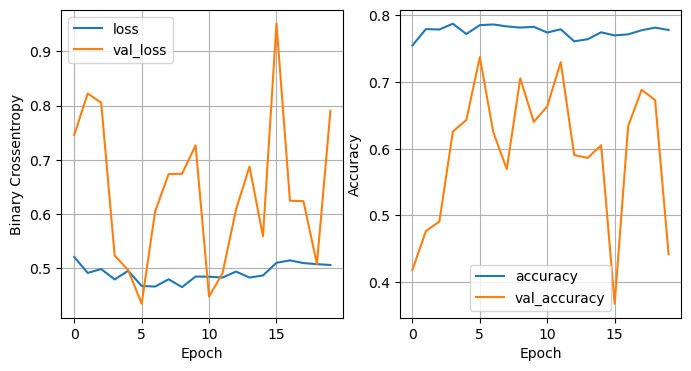

nodes 16, dropout 0.2, lr 0.1, batch size 128


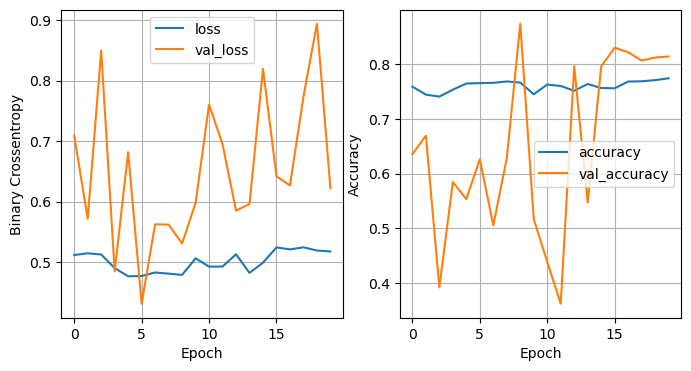

nodes 16, dropout 0.2, lr 0.005, batch size 32


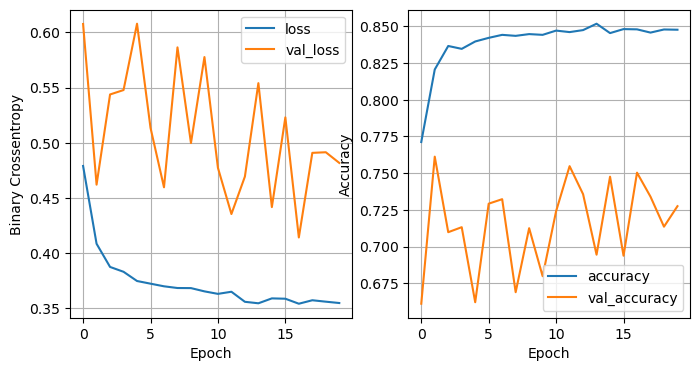

nodes 16, dropout 0.2, lr 0.005, batch size 64


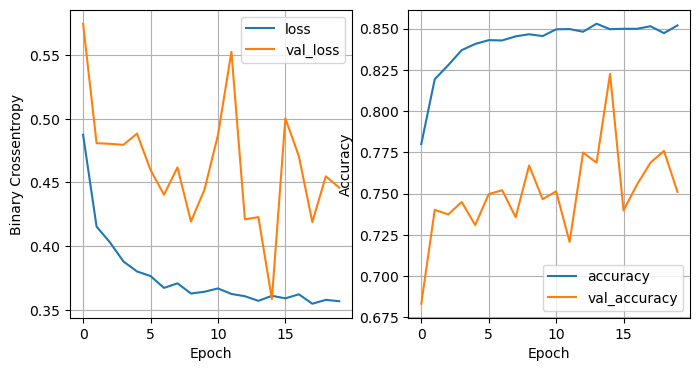

nodes 16, dropout 0.2, lr 0.005, batch size 128


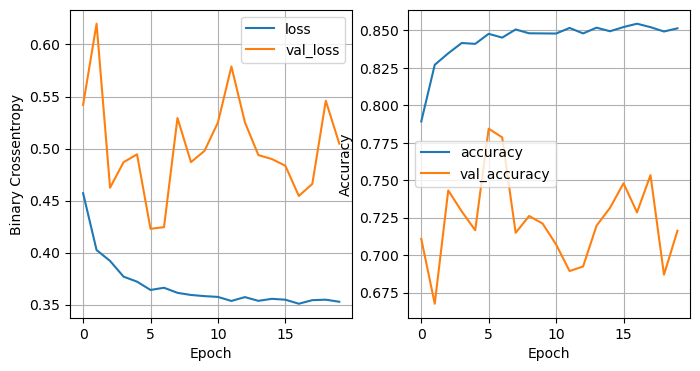

nodes 16, dropout 0.2, lr 0.005, batch size 32


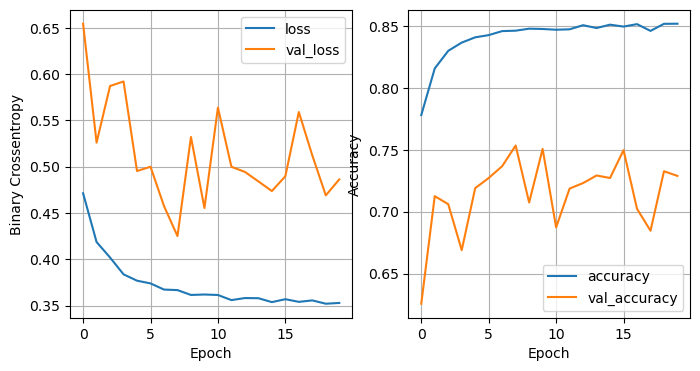

nodes 16, dropout 0.2, lr 0.005, batch size 64


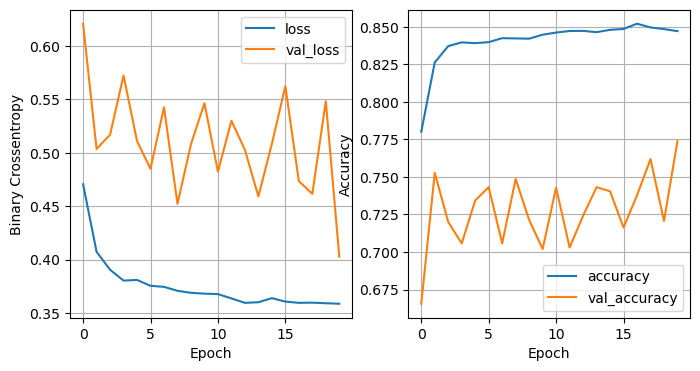

nodes 16, dropout 0.2, lr 0.005, batch size 128


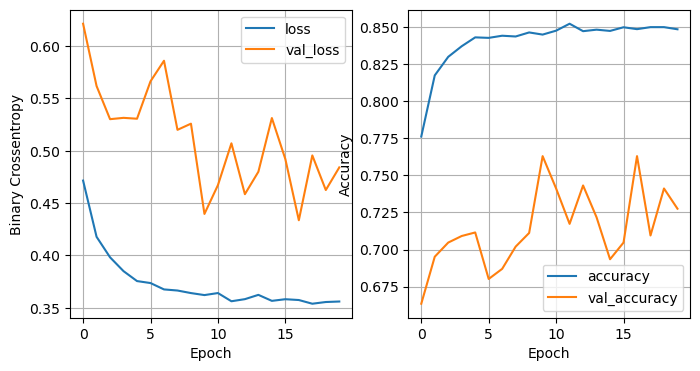

nodes 32, dropout 0, lr 0.1, batch size 32


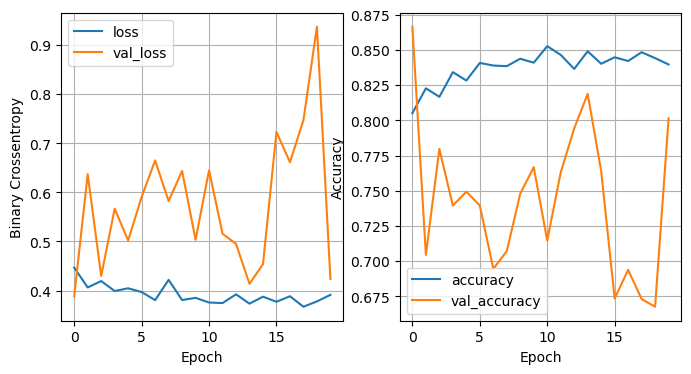

nodes 32, dropout 0, lr 0.1, batch size 64


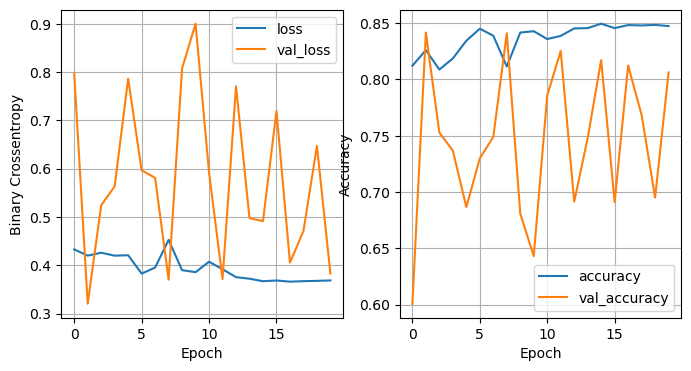

nodes 32, dropout 0, lr 0.1, batch size 128


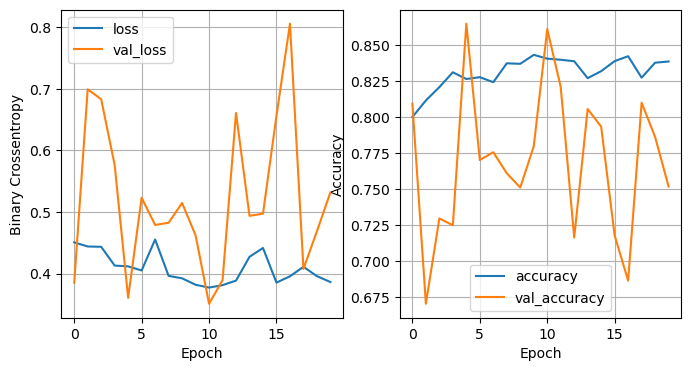

nodes 32, dropout 0, lr 0.005, batch size 32


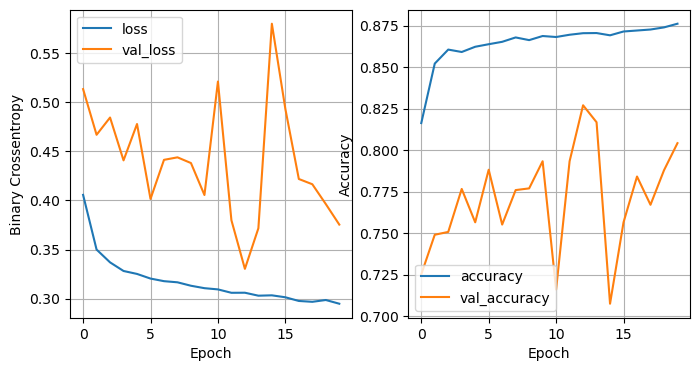

nodes 32, dropout 0, lr 0.005, batch size 64


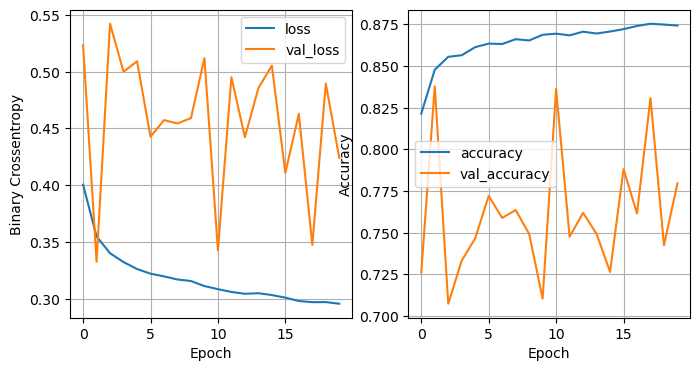

nodes 32, dropout 0, lr 0.005, batch size 128


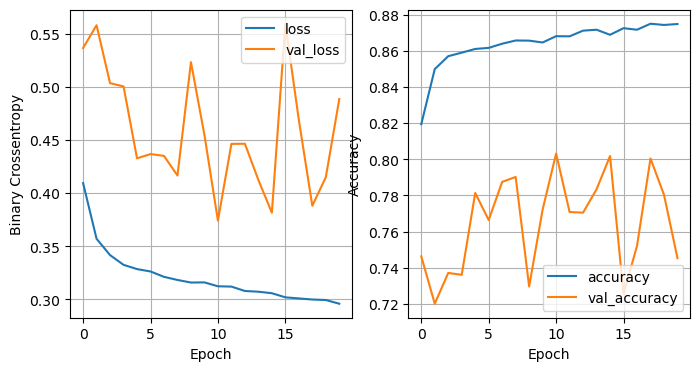

nodes 32, dropout 0, lr 0.005, batch size 32


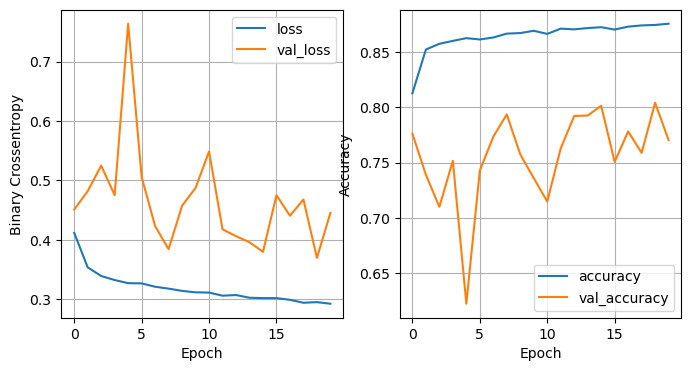

nodes 32, dropout 0, lr 0.005, batch size 64


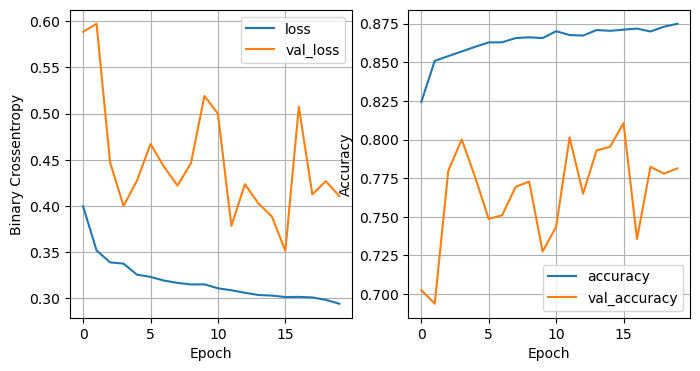

nodes 32, dropout 0, lr 0.005, batch size 128


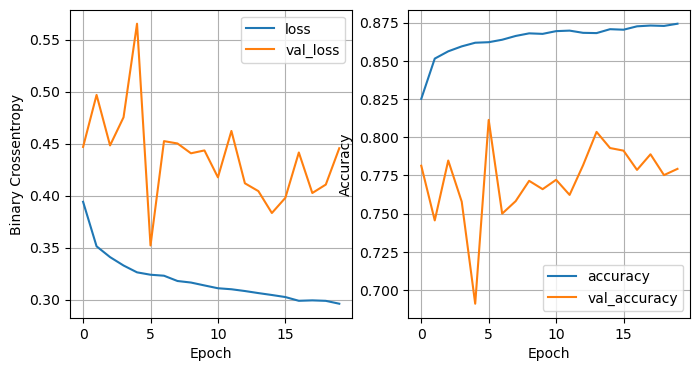

nodes 32, dropout 0.2, lr 0.1, batch size 32


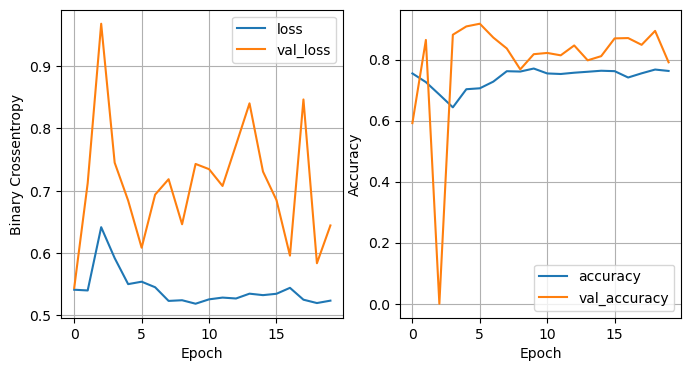

nodes 32, dropout 0.2, lr 0.1, batch size 64


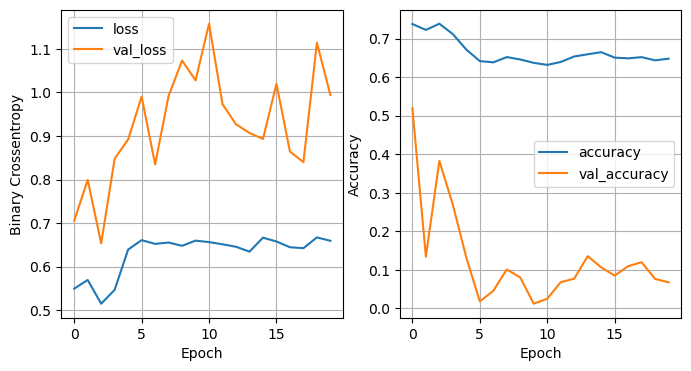

nodes 32, dropout 0.2, lr 0.1, batch size 128


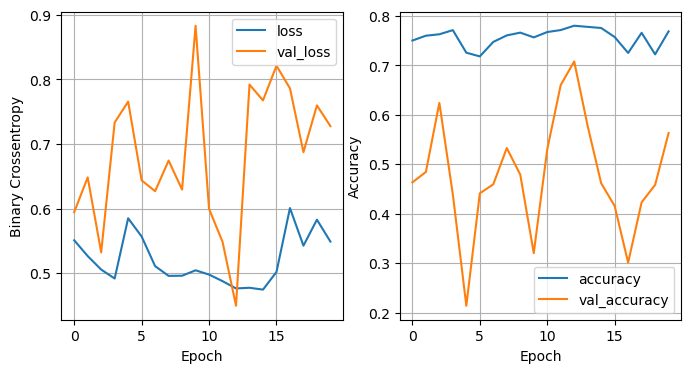

nodes 32, dropout 0.2, lr 0.005, batch size 32


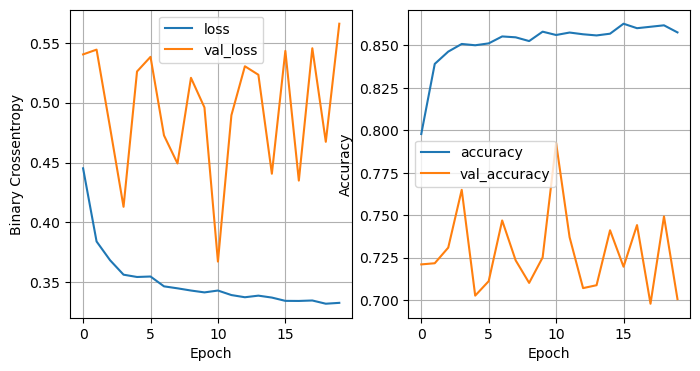

nodes 32, dropout 0.2, lr 0.005, batch size 64


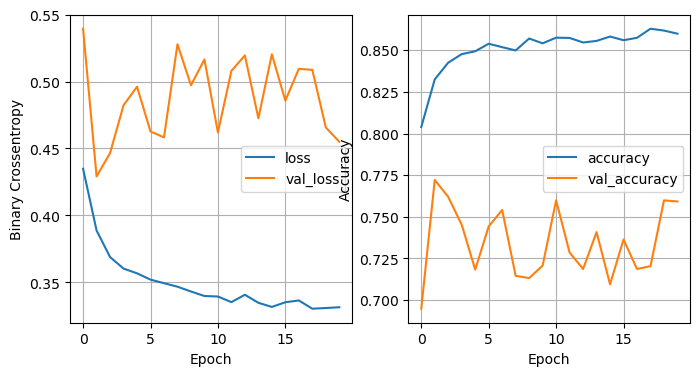

nodes 32, dropout 0.2, lr 0.005, batch size 128


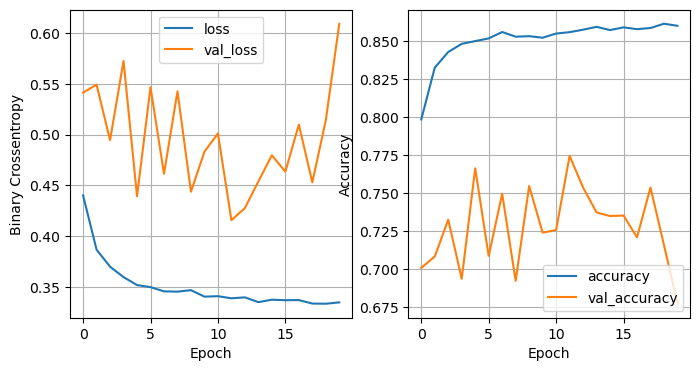

nodes 32, dropout 0.2, lr 0.005, batch size 32


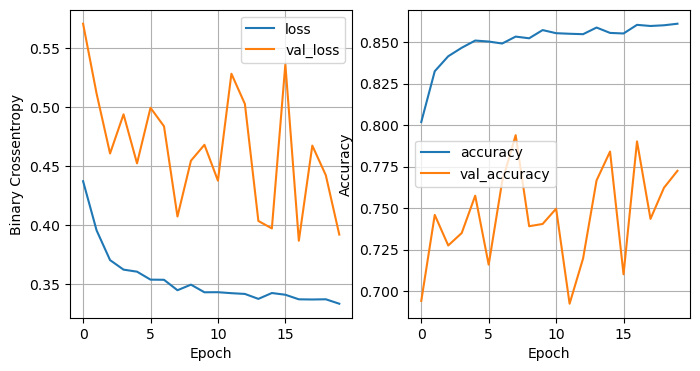

nodes 32, dropout 0.2, lr 0.005, batch size 64


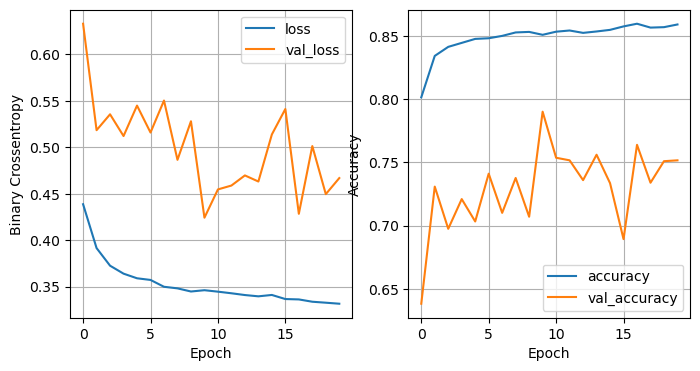

nodes 32, dropout 0.2, lr 0.005, batch size 128


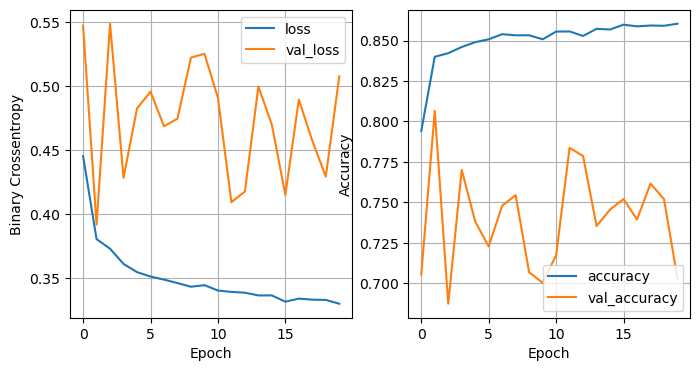

nodes 64, dropout 0, lr 0.1, batch size 32


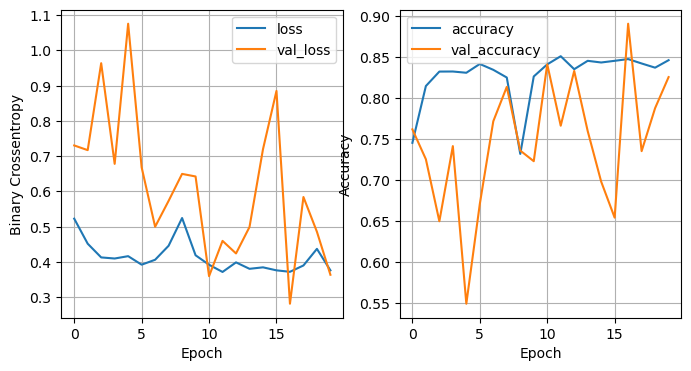

nodes 64, dropout 0, lr 0.1, batch size 64


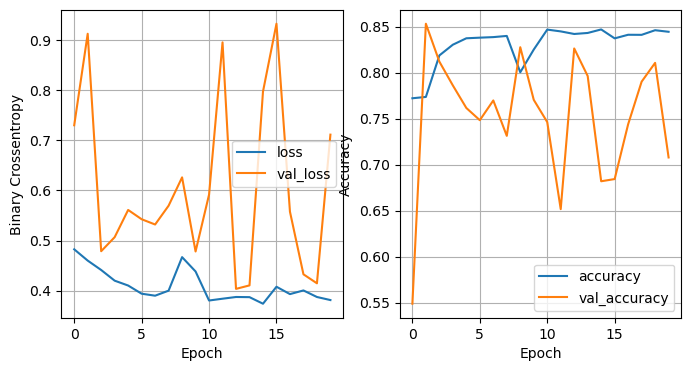

nodes 64, dropout 0, lr 0.1, batch size 128


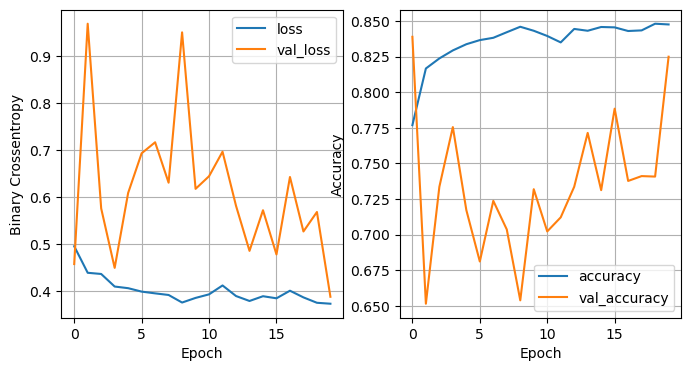

nodes 64, dropout 0, lr 0.005, batch size 32


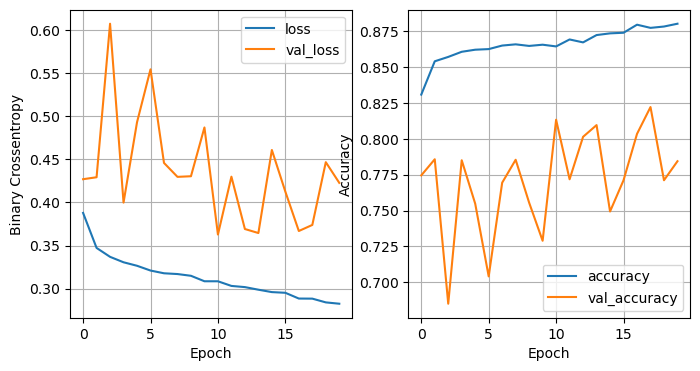

nodes 64, dropout 0, lr 0.005, batch size 64


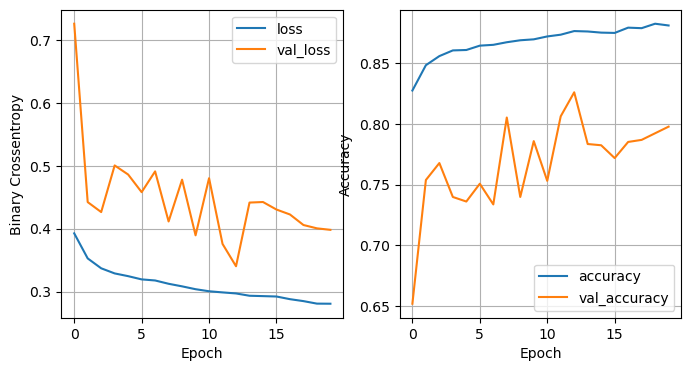

nodes 64, dropout 0, lr 0.005, batch size 128


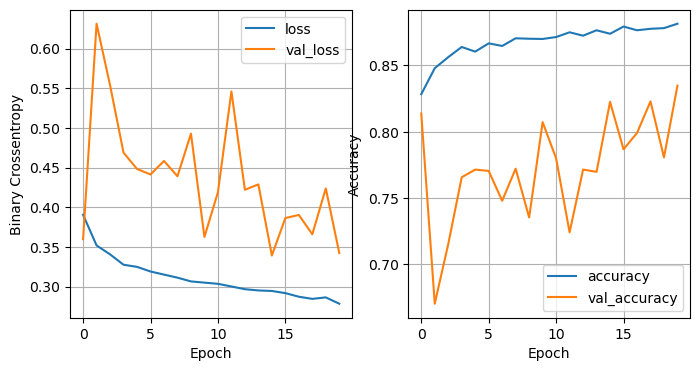

nodes 64, dropout 0, lr 0.005, batch size 32


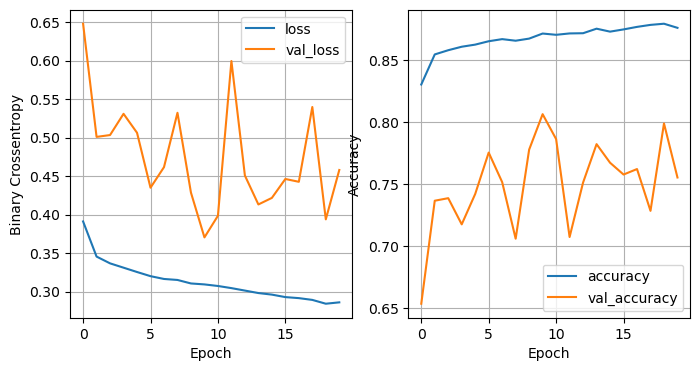

nodes 64, dropout 0, lr 0.005, batch size 64


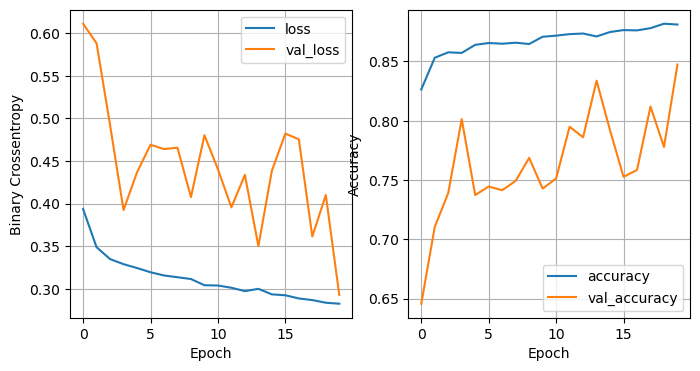

nodes 64, dropout 0, lr 0.005, batch size 128


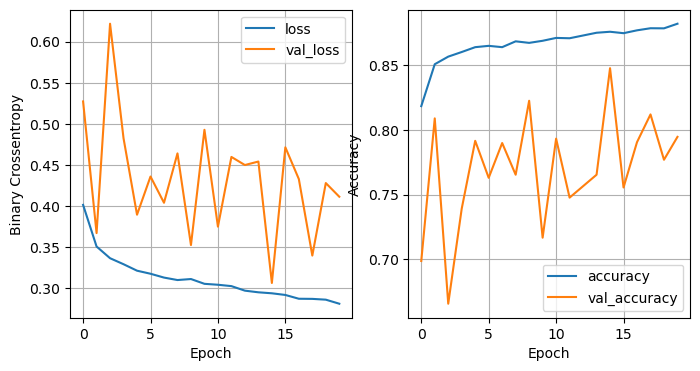

nodes 64, dropout 0.2, lr 0.1, batch size 32


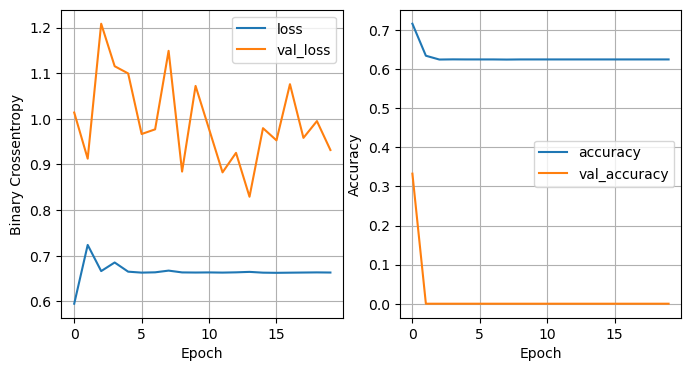

nodes 64, dropout 0.2, lr 0.1, batch size 64


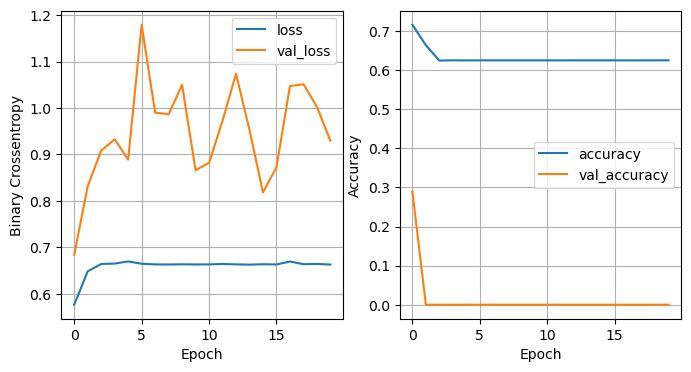

nodes 64, dropout 0.2, lr 0.1, batch size 128


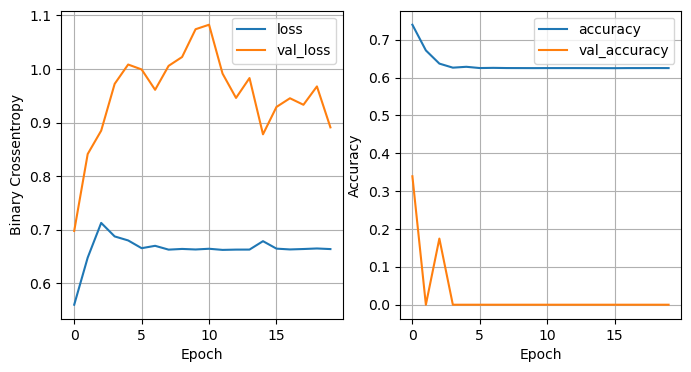

nodes 64, dropout 0.2, lr 0.005, batch size 32


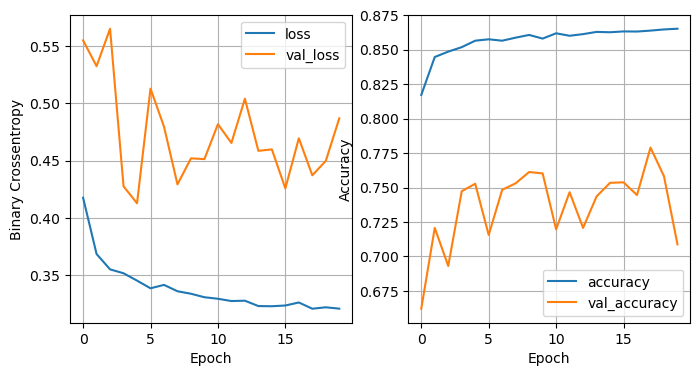

nodes 64, dropout 0.2, lr 0.005, batch size 64


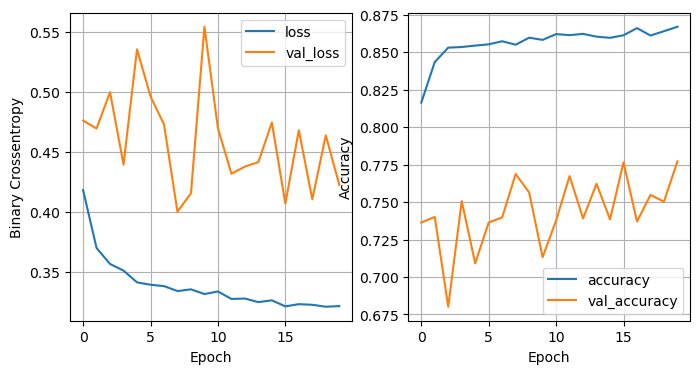

nodes 64, dropout 0.2, lr 0.005, batch size 128


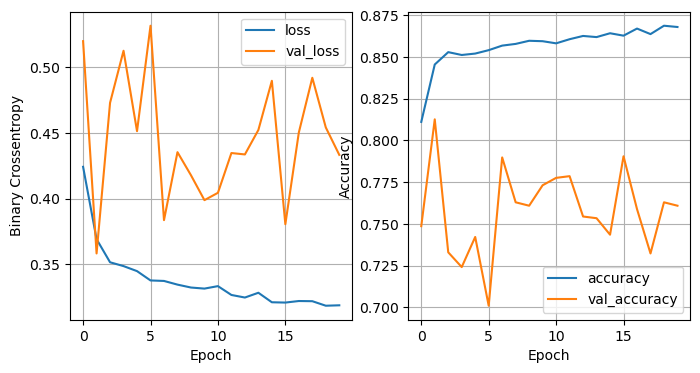

nodes 64, dropout 0.2, lr 0.005, batch size 32


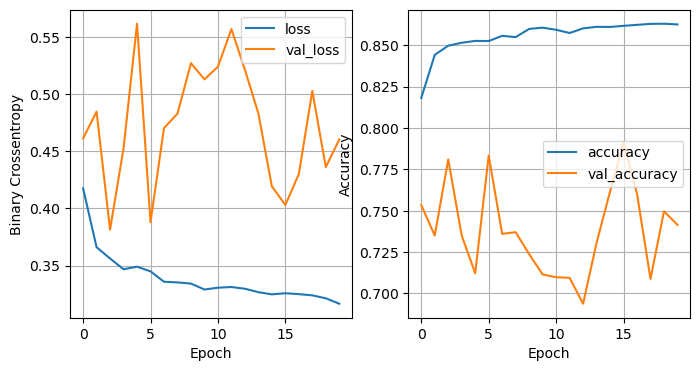

nodes 64, dropout 0.2, lr 0.005, batch size 64


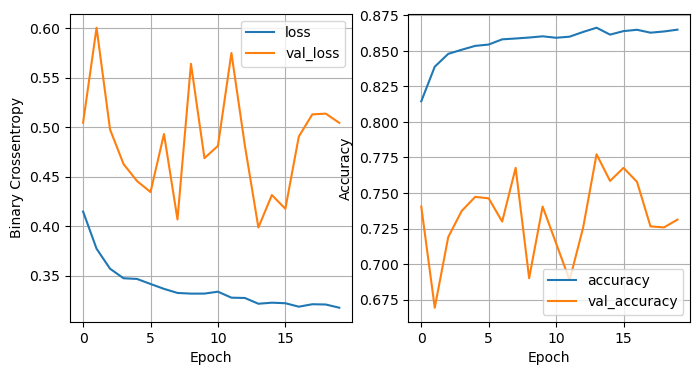

nodes 64, dropout 0.2, lr 0.005, batch size 128


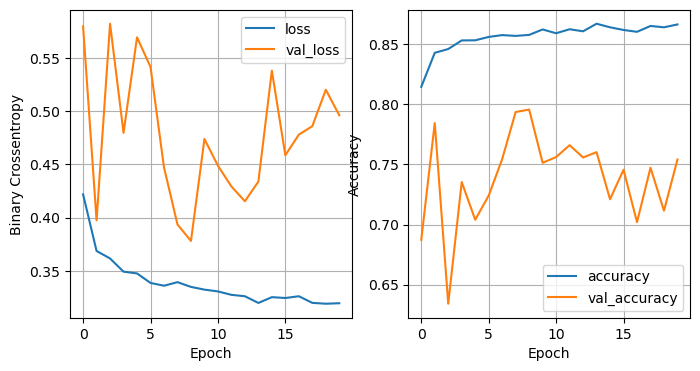

In [35]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 10

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.005]:
            for batch_size in [32, 64, 128]:
                print(f'nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid, verbose=0)[0]  # Extract the loss value
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [36]:
y_pred = least_loss_model.predict(X_test)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.7727634 ],
       [0.9061623 ],
       [0.8357172 ],
       ...,
       [0.99238646],
       [0.9771438 ],
       [0.99418265]], dtype=float32)

In [37]:
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1301
           1       0.86      0.95      0.91      2503

    accuracy                           0.87      3804
   macro avg       0.87      0.83      0.85      3804
weighted avg       0.87      0.87      0.87      3804

